In [1]:
# задаем рабочую директорию
setwd("/Users/artemgruzdev/Course_ML/Data")

In [2]:
# отключаем предупреждения
options(warn = -1)

# считываем CSV-файл в датафрейм data
data <- read.csv2("Bankloan.csv", sep = ";")

In [3]:
# смотрим первые 10 наблюдений 
# датафрейма data
head(data, 10)

age,job,employ,address,income,debtinc,creddebt,othdebt,default
28,working - other,7,2,44,17.7,2.990592,4.797408,0
64,working - production,34,17,116,14.7,5.047392,12.004608,0
40,working - IT,20,12,61,4.8,1.042368,1.885632,0
30,working - IT,11,3,27,34.5,1.751220,7.563780,0
25,working - IT,2,2,30,22.4,0.759360,5.960640,1
35,working - IT,2,9,38,10.9,1.462126,2.679874,1
26,own business,2,4,38,11.9,0.954142,3.567858,1
25,working - IT,4,2,30,14.4,1.045440,3.274560,0
65,civil service,29,14,189,5.0,3.364200,6.085800,0
21,own business,0,0,23,3.9,0.305877,0.591123,0


In [4]:
# смотрим типы переменных
str(data)

'data.frame':	1500 obs. of  9 variables:
 $ age     : int  28 64 40 30 25 35 26 25 65 21 ...
 $ job     : Factor w/ 5 levels "civil service",..: 4 5 3 3 3 3 2 3 1 2 ...
 $ employ  : int  7 34 20 11 2 2 2 4 29 0 ...
 $ address : int  2 17 12 3 2 9 4 2 14 0 ...
 $ income  : int  44 116 61 27 30 38 38 30 189 23 ...
 $ debtinc : num  17.7 14.7 4.8 34.5 22.4 10.9 11.9 14.4 5 3.9 ...
 $ creddebt: num  2.991 5.047 1.042 1.751 0.759 ...
 $ othdebt : num  4.8 12 1.89 7.56 5.96 ...
 $ default : int  0 0 0 0 1 1 1 0 0 0 ...


In [5]:
# преобразовываем переменную default в фактор,
# при этом значения 0 и 1 запишем как Good и Bad
data$default <- factor(data$default, levels = c(0, 1), 
                       labels = c("Good", "Bad"))

In [6]:
# смотрим итоги преобразований
print(head(data))
print(str(data))

  age                  job employ address income debtinc creddebt   othdebt
1  28      working - other      7       2     44    17.7 2.990592  4.797408
2  64 working - production     34      17    116    14.7 5.047392 12.004608
3  40         working - IT     20      12     61     4.8 1.042368  1.885632
4  30         working - IT     11       3     27    34.5 1.751220  7.563780
5  25         working - IT      2       2     30    22.4 0.759360  5.960640
6  35         working - IT      2       9     38    10.9 1.462126  2.679874
  default
1    Good
2    Good
3    Good
4    Good
5     Bad
6     Bad
'data.frame':	1500 obs. of  9 variables:
 $ age     : int  28 64 40 30 25 35 26 25 65 21 ...
 $ job     : Factor w/ 5 levels "civil service",..: 4 5 3 3 3 3 2 3 1 2 ...
 $ employ  : int  7 34 20 11 2 2 2 4 29 0 ...
 $ address : int  2 17 12 3 2 9 4 2 14 0 ...
 $ income  : int  44 116 61 27 30 38 38 30 189 23 ...
 $ debtinc : num  17.7 14.7 4.8 34.5 22.4 10.9 11.9 14.4 5 3.9 ...
 $ creddebt: num 

## Обычная k-блочная перекрестная проверка

In [7]:
# загружаем необходимые пакеты
library(caret)
library(randomForest)
library(e1071)
library(pROC)

Loading required package: lattice
Loading required package: ggplot2
randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:ggplot2’:

    margin

Type 'citation("pROC")' for a citation.

Attaching package: ‘pROC’

The following objects are masked from ‘package:stats’:

    cov, smooth, var



In [8]:
# создаем массив признаков и массив меток
features <- setdiff(names(data), "default")
x <- data[, features]
y <- data$default

In [9]:
# загружаем необходимые пакеты
library(caret)
library(randomForest)
library(e1071)
library(pROC)

In [10]:
# задаем стратегию проверки
set.seed(42)
train_control <- trainControl(method = "cv", number = 10)
model <- train(x = x, y = y, 
               method = "rf",
               trControl = train_control, 
               tuneGrid=data.frame(mtry = floor(sqrt(ncol(x)))))
print(model)

Random Forest 

1500 samples
   8 predictor
   2 classes: 'Good', 'Bad' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 1351, 1349, 1349, 1350, 1350, 1350, ... 
Resampling results:

  Accuracy   Kappa    
  0.7406396  0.4235846

Tuning parameter 'mtry' was held constant at a value of 2


In [11]:
# задаем стратегию проверки
set.seed(42)
train_control <- trainControl(method = "cv", number = 10, 
                              classProbs = TRUE, 
                              summaryFunction = twoClassSummary)
model <- train(x = x, 
               y = y, 
               method = "rf",
               trControl = train_control,
               tuneGrid=data.frame(mtry = floor(sqrt(ncol(x)))),
               metric = "ROC")
print(model)

Random Forest 

1500 samples
   8 predictor
   2 classes: 'Good', 'Bad' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 1351, 1349, 1349, 1350, 1350, 1350, ... 
Resampling results:

  ROC        Sens       Spec    
  0.8130273  0.8372039  0.573064

Tuning parameter 'mtry' was held constant at a value of 2


## Повторная k-блочная перекрестная проверка

In [12]:
# задаем стратегию проверки
set.seed(42)
train_control <- trainControl(method = "repeatedcv",    
                              number = 10, repeats=5)
model <- train(x = x, 
               y = y, 
               method = "rf",
               trControl = train_control,
               tuneGrid=data.frame(mtry = floor(sqrt(ncol(x)))))
print(model)

Random Forest 

1500 samples
   8 predictor
   2 classes: 'Good', 'Bad' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 1351, 1349, 1349, 1350, 1350, 1350, ... 
Resampling results:

  Accuracy   Kappa    
  0.7446795  0.4324905

Tuning parameter 'mtry' was held constant at a value of 2


## Перекрестная проверка с исключением по одному

In [13]:
# задаем стратегию проверки, для уменьшения
# времени вычислений сократим количество
# деревьев в ансамбле до 10 и увеличив
# минимальный размер терминального узла
train_control <- trainControl(method = "LOOCV")
num_of_cols = floor(sqrt(ncol(x)))
model <- train(x = x, 
               y = y, 
               method = "rf", ntree=10, nodesize=200,
               trControl = train_control,
               tuneGrid=data.frame(mtry = num_of_cols))
print(model)

Random Forest 

1500 samples
   8 predictor
   2 classes: 'Good', 'Bad' 

No pre-processing
Resampling: Leave-One-Out Cross-Validation 
Summary of sample sizes: 1499, 1499, 1499, 1499, 1499, 1499, ... 
Resampling results:

  Accuracy   Kappa  
  0.7213333  0.34918

Tuning parameter 'mtry' was held constant at a value of 2


## Комбинированная проверка с помощью пакета caret

In [14]:
# задаем стартовое значение генератора случайных
# чисел для воспроизводимости результатов разбиения
set.seed(42)

# создаем переменную random_number, которая случайным
# образом разбивает набор данных на обучающую
# и контрольную выборки
random_number <- runif(nrow(data), 0, 1)
development <- data[random_number > 0.3, ]
holdout <- data[random_number <= 0.3, ]

In [15]:
# задаем сетку гиперпараметров для решетчатого поиска
tunegrid <- expand.grid(mtry = c(1:7))

In [16]:
# задаем набор условий для оптимизации по правильности
control_acc <- trainControl(method = "cv", 
                            number = 5, 
                            search = "grid")

In [17]:
# строим модели случайного леса и выбираем оптимальную с т.з. правильности
set.seed(152)
rf_gridsearch_acc <- train(default ~ ., data = development, method = "rf", 
                           tuneGrid = tunegrid, trControl = control_acc)

# выводим результаты решетчатого поиска 
print(rf_gridsearch_acc)

Random Forest 

1034 samples
   8 predictor
   2 classes: 'Good', 'Bad' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 828, 827, 827, 827, 827 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
  1     0.7175648  0.3001219
  2     0.7359645  0.3999534
  3     0.7253178  0.3774017
  4     0.7156372  0.3584571
  5     0.7146710  0.3597589
  6     0.7137001  0.3556441
  7     0.7098354  0.3459508

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 2.


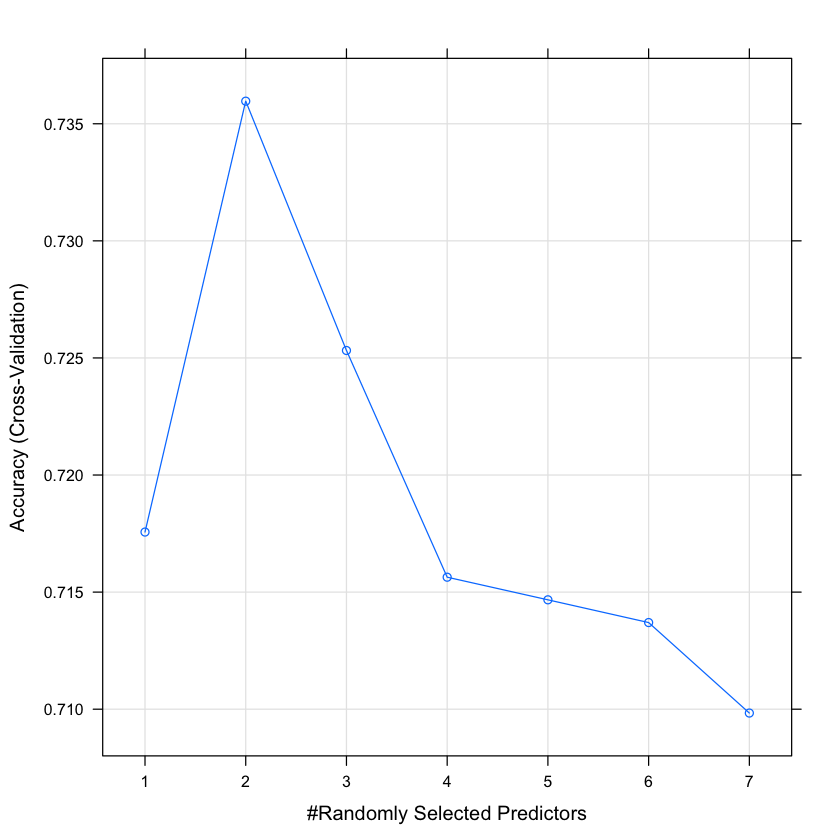

In [18]:
# визуализируем результаты решетчатого поиска 
plot(rf_gridsearch_acc)

In [19]:
# вычисляем правильность оптимальной модели
# на контрольной выборке, не участвовшей
# в обучении и настройке гиперпараметров
actual <- holdout$default
predvalues <- predict(rf_gridsearch_acc, holdout)
cm <- as.matrix(table(actual, predvalues))
n <- sum(cm) # количество наблюдений
diag <- diag(cm) # количество правильно классифицированных
accuracy <- sum(diag) / n 
accuracy

[1] 0.7467811

In [20]:
# задаем набор условий для оптимизации по AUC
control_auc <- trainControl(method = "cv", number = 5, search = "grid",
                            classProbs = TRUE, 
                            summaryFunction = twoClassSummary)

In [21]:
# строим модели случайного леса и выбираем оптимальную с т.з. AUC
set.seed(152)
rf_gridsearch_auc <- train(default ~ ., data = development, method = "rf", 
                           metric = "ROC",
                           tuneGrid = tunegrid, 
                           trControl = control_auc)

# выводим результаты решетчатого поиска 
print(rf_gridsearch_auc)

Random Forest 

1034 samples
   8 predictor
   2 classes: 'Good', 'Bad' 

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 828, 827, 827, 827, 827 
Resampling results across tuning parameters:

  mtry  ROC        Sens       Spec     
  1     0.7928162  0.9453620  0.3173333
  2     0.7874899  0.8558177  0.5253333
  3     0.7864352  0.8451885  0.5146667
  4     0.7832038  0.8315059  0.5120000
  5     0.7816771  0.8239301  0.5226667
  6     0.7793842  0.8269604  0.5146667
  7     0.7758749  0.8254569  0.5066667

ROC was used to select the optimal model using the largest value.
The final value used for the model was mtry = 1.


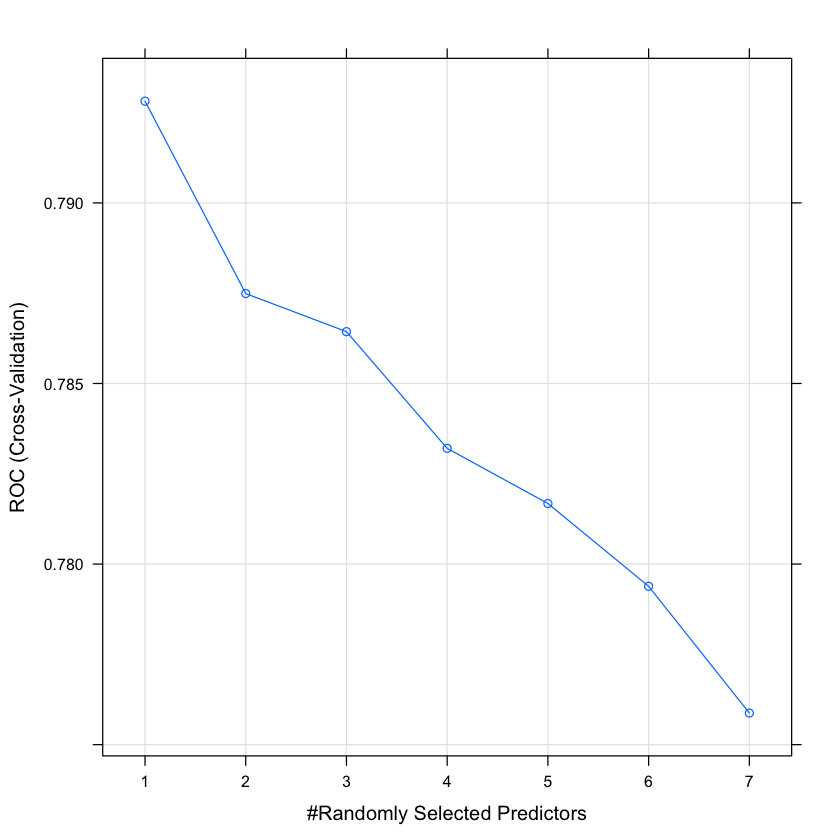

In [22]:
# визуализируем результаты решетчатого поиска 
plot(rf_gridsearch_auc)

In [23]:
# вычисляем AUC оптимальной модели
# на контрольной выборке, не участвовшей
# в обучении и настройке гиперпараметров
prob <- predict(rf_gridsearch_auc, holdout, type = "prob")
roc(holdout$default, prob[, 2], ci = TRUE)


Call:
roc.default(response = holdout$default, predictor = prob[, 2],     ci = TRUE)

Data: prob[, 2] in 293 controls (holdout$default Good) < 173 cases (holdout$default Bad).
Area under the curve: 0.8199
95% CI: 0.7812-0.8587 (DeLong)

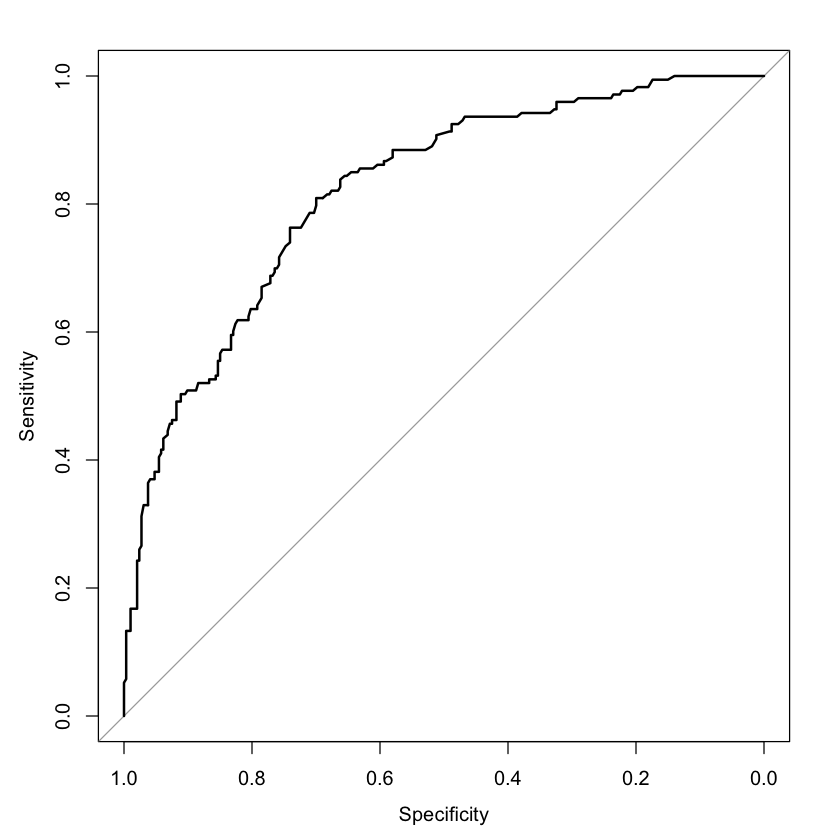

In [24]:
# строим ROC-кривую оптимальной модели
# на контрольной выборке, не участвовшей
# в обучении и настройке гиперпараметров
plot(roc(holdout$default, prob[, 2], ci = TRUE))

## Бутстреп

In [25]:
# загружаем пакет rpart
library(rpart)
# задаем стартовое значение генератора случайных
# чисел для воспроизводимости результатов разбиения
set.seed(42)

# создаем переменную random_number, которая случайным образом 
# разбивает набор данных на обучающую и контрольную выборки
random_number <- runif(nrow(data), 0, 1)
development <- data[random_number > 0.3, ]
holdout <- data[random_number <= 0.3, ]

# пишем функцию, вычисляющую правильность
accuracy <- function(model){
    actual <- holdout$default
    predicted <- predict(model, holdout, type = "class")
    cm <- as.matrix(table(actual, predicted))
    n <- sum(cm) # количество наблюдений
    diag <- diag(cm) # количество правильно классифицированных
    accuracy <- sum(diag) / n 
    return(accuracy)
}

# задаем количество бутстреп-выборок
R <- 100
# задаем количество элементов для обучающих бутстреп-выборок
k <- nrow(development)
# задаем количество элементов для контрольных бутстреп-выборок
n <- nrow(holdout)

# сюда будем записывать значения правильности и AUC 
tree.acc_boot <- numeric(100)
tree.auc_boot <- numeric(100)

# выполняем бутстреп, на каждой итерации формируем на основе исходной обучающей выборки 
# бутстреп-выборку, формируем на основе исходной контрольной выборки бутстреп-выборку, строим 
# модель по бутстреп-выборке, сгенерированной на основе исходной обучающей выборки, проверяем ее 
# на бутстреп-выборке, сгенерированной на основе исходной контрольной выборки
set.seed(701)
for(i in 1:R){
  obs_dev.boot <- sample(x = 1:k, size = k, replace = TRUE)
  development.boot <- development[obs_dev.boot, ]
  obs_hold.boot <- sample(x = 1:n, size = n, replace = TRUE)
  holdout.boot <- holdout[obs_hold.boot, ]
  tree <- rpart(default ~ . , data = development.boot)
  tree.score_boot <- predict(tree, holdout.boot, type = "prob")
  tree.roc_boot <- roc(holdout.boot$default, tree.score_boot[, 2])
  tree.auc_boot[i] <- tree.roc_boot$auc
  tree.acc_boot[i] <- accuracy(tree)
}

# вычисляем среднее значение правильности
mean_acc <- mean(tree.acc_boot)
# вычисляем среднее значение AUC
mean_auc <- mean(tree.auc_boot)

# печатаем средние значения правильности и AUC
results <- list(mean_acc, mean_auc)
names(results) <- c("среднее значение правильности", 
                    "среднее значение AUC")
print(results)

$`среднее значение правильности`
[1] 0.7198069

$`среднее значение AUC`
[1] 0.7418901



## Доверительный интервал

### Асимптотический метод

#### Учимся вычислять асимптотический 95%-ный доверительный интервал среднего

In [26]:
# задаем стартовое значение генератора
# случайных чисел
set.seed(42)
# генеририруем 50 случайных чисел
# в диапазоне от 45 до 100
income <- runif(50, min = 45, max = 100)

In [27]:
# вычисляем среднее значение дохода
mean_income <- mean(income)
mean_income

[1] 77.93634

In [28]:
# записываем информацию о размере выборки
N <- 50

In [29]:
# вычисляем предел погрешности 
err <- 1.645 * (sd(income) / sqrt(N))

In [30]:
# вычисляем нижнюю границу 90%-ного
# доверительного интервала 
mean_income - err

[1] 74.05113

In [31]:
# вычисляем верхнюю границу 90%-ного
# доверительного интервала 
mean_income + err

[1] 81.82156

### Бутстреп-метод

#### Учимся вычислять бутстрепированный 95%-ный доверительный интервал среднего

In [32]:
# создаем 1000 бутстреп-выборок и вычисляем
# 1000 средних значений дохода
boot <- replicate(1000, 
                  mean(sample(income, 
                              replace = TRUE)))

In [33]:
# вычисляем нижнюю границу 95%-ного
# доверительного интервала
quantile(boot, 0.025)

2.5% 
72.96364

In [34]:
# вычисляем верхнюю границу 95%-ного
# доверительного интервала
quantile(boot, 0.975)

97.5% 
82.40025

### Доверительный интервал метрики качества (на примере AUC)

#### Учимся вычислять бутстрепированный 95%-ный доверительный интервал AUC и правильности

In [35]:
# вычисляем бутстрепированный 95%-ный 
# доверительный интервал правильности
tree_acc.ci = quantile(tree.acc_boot,c(.025,.975))
# вычисляем бутстрепированный 95%-ный 
# доверительный интервал AUC
tree_auc.ci = quantile(tree.auc_boot,c(.025,.975))
# печатаем бутстрепированные 95%-ные доверительные
# интервалы правильности и AUC
results <- list(tree_acc.ci, tree_auc.ci)
acc_string = "бутстрепированный 95%-ный дов. интервал правильности"
auc_string = "бутстрепированный 95%-ный дов. интервал AUC"
names(results) <- c(acc_string, auc_string)
print(results)

$`бутстрепированный 95%-ный дов. интервал правильности`
     2.5%     97.5% 
0.6898605 0.7467811 

$`бутстрепированный 95%-ный дов. интервал AUC`
     2.5%     97.5% 
0.6615808 0.7987849 

